In [1]:
import pandas as pd

In [25]:
data

0                                                   1578.85
1                                                   1576.77
2                                                   1575.44
3                                                   1574.65
4                                                   1575.08
                                ...                        
5952                                                1425.42
5953                                                1424.94
5954                                                1421.06
5955                                                1421.97
Return    0            NaN
1      -0.131741
2      -0.08...
Name: diamonds, Length: 5957, dtype: object

/var/folders/h1/ggmfny9n1kngv0q50k83f0400000gn/T/ipykernel_42385/1275627080.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Return'] = 100 * (data.pct_change())
/Users/kajsajernetz/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.02224. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/kajsajernetz/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of th

╒══════════╤══════════════════════╤════════════════════════╤═══════════════════════╕
│          │  Daily Volatility %  │  Monthly Volatility %  │  Annual Volatility %  │
╞══════════╪══════════════════════╪════════════════════════╪═══════════════════════╡
│ Diamonds │         0.15         │          0.68          │         2.37          │
╘══════════╧══════════════════════╧════════════════════════╧═══════════════════════╛
mu         -0.001839
omega       0.000445
alpha[1]    0.100000
beta[1]     0.879999
Name: params, dtype: float64


           h.1      h.2       h.3       h.4       h.5
5955  0.015454  0.01559  0.015723  0.015854  0.015982


/Users/kajsajernetz/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.02305. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/kajsajernetz/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.02304. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/kajsajernetz/opt/anaconda3/lib/python

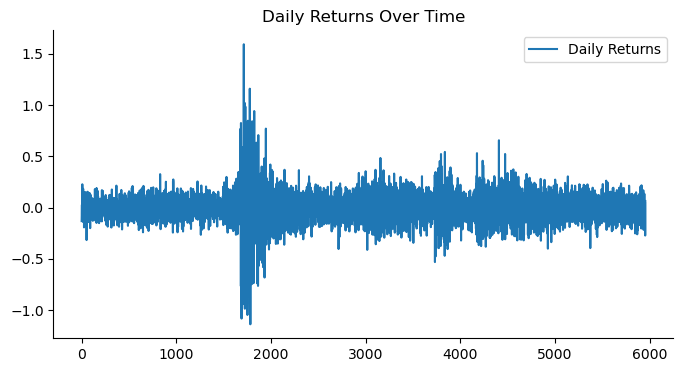

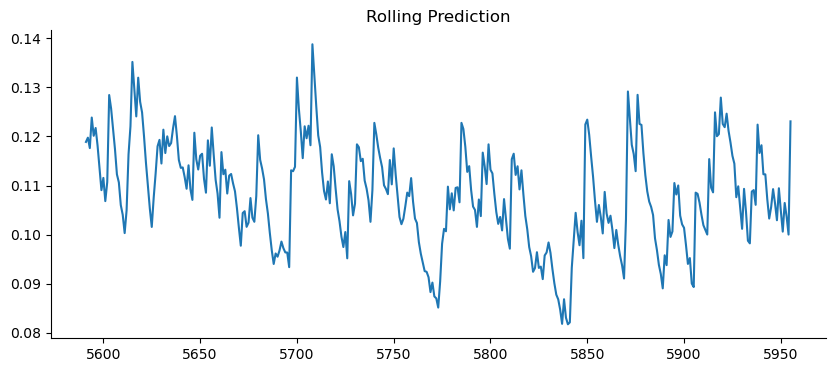

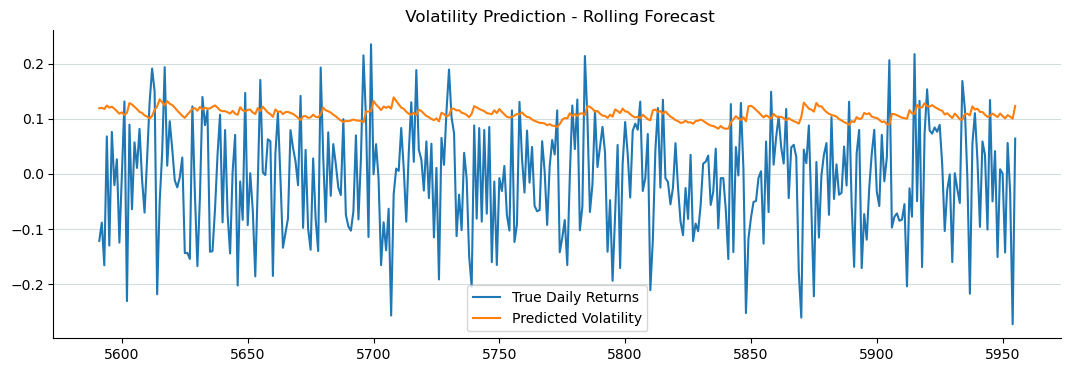

In [34]:
df = pd.read_csv("example_prices.csv")
df

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = df.diamonds
data['Return'] = 100 * (data.pct_change())

data.dropna(inplace=True)

fig,ax = plt.subplots(figsize=(8,4))
ax.spines[['top','right']].set_visible(False)
plt.plot(data['Return'], label = 'Daily Returns')
plt.legend(loc='upper right')
plt.title('Daily Returns Over Time')

daily_volatility = data['Return'].std()

monthly_volatility = math.sqrt(21) * daily_volatility

annual_volatility = math.sqrt(252) * daily_volatility

from tabulate import tabulate

print(tabulate([['Diamonds',daily_volatility,monthly_volatility,annual_volatility]],headers = ['Daily Volatility %', 'Monthly Volatility %', 'Annual Volatility %'],tablefmt = 'fancy_grid',stralign='center',numalign='center',floatfmt=".2f"))


# Build GARCH
from arch import arch_model
from arch.__future__ import reindexing


garch_model = arch_model(data['Return'][1::], p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')

gm_result = garch_model.fit(disp='off')
print(gm_result.params)

print('\n')

gm_forecast = gm_result.forecast(horizon = 5)
print(gm_forecast.variance[-1:])


# Rolling predictions
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = data['Return'][1::][:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
   
rolling_predictions = pd.Series(rolling_predictions, index=data['Return'][1::].index[-365:])

fig,ax = plt.subplots(figsize=(10,4))
ax.spines[['top','right']].set_visible(False)
plt.plot(rolling_predictions)
plt.title('Rolling Prediction')

# Accuracy test 

fig,ax = plt.subplots(figsize=(13,4))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
ax.spines[['top','right']].set_visible(False)
plt.plot(data['Return'][1::][-365:])
plt.plot(rolling_predictions)
plt.title(' Volatility Prediction - Rolling Forecast')
plt.legend(['True Daily Returns', 'Predicted Volatility'])

In [29]:
data['Return'][1::]

1      -0.131741
2      -0.084350
3      -0.050145
4       0.027308
5      -0.071107
          ...   
5951   -0.142291
5952    0.056155
5953   -0.033674
5954   -0.272292
5955    0.064037
Name: diamonds, Length: 5955, dtype: float64

Iteration:      1,   Func. Count:     13,   Neg. LLF: 176087.64230903634
Iteration:      2,   Func. Count:     28,   Neg. LLF: 46232.64822719952
Iteration:      3,   Func. Count:     40,   Neg. LLF: 46232.646961496306
Iteration:      4,   Func. Count:     52,   Neg. LLF: 46232.641806176085
Iteration:      5,   Func. Count:     64,   Neg. LLF: 46232.63498637323
Iteration:      6,   Func. Count:     76,   Neg. LLF: 46232.63498500355
Iteration:      7,   Func. Count:     88,   Neg. LLF: 46232.63498421911
Optimization terminated successfully    (Exit mode 0)
            Current function value: 46232.63498421911
            Iterations: 7
            Function evaluations: 88
            Gradient evaluations: 7


/Users/kajsajernetz/opt/anaconda3/lib/python3.9/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


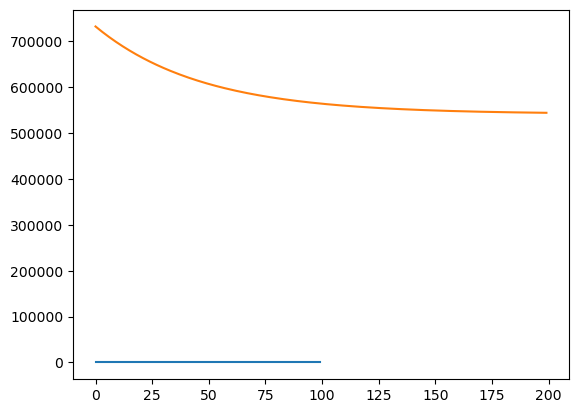

In [18]:
from random import gauss
from random import seed
from matplotlib import pyplot
from arch import arch_model


# example of ARCH model

# seed pseudorandom number generator
seed(1)
# create dataset
data = df.bananas
# split into train/test
n_test = 200 #int(len(data)/2)
train, test = data[:-n_test], data[-n_test:]
# define model
model = arch_model(train, mean='Zero', vol='GARCH', p=5, q=5)
# fit model
model_fit = model.fit()
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)
# plot the actual variance
# var = [i*0.01 for i in range(0,100)]
pyplot.plot(var[-n_test:])
# plot forecast variance
pyplot.plot(yhat.variance.values[-1, :])
pyplot.show()

# define model
model = arch_model(train, mean='Zero', vol='GARCH', p=5, q=5)

In [ ]:
!pip install arch

In [4]:
!pip install train

  Preparing metadata (setup.py) ... done
  Created wheel for train: filename=train-0.0.5-py3-none-any.whl size=8490 sha256=8963573b564b8c7b0d405dbfb23c36f12af77c043bf91c6b6592747c493bb1dd
  Stored in directory: /Users/kajsajernetz/Library/Caches/pip/wheels/45/92/ea/b1175117dac051e6dcbc9a4e2b50951273b3086809cb807705
Successfully built train
